# 1
Utilize o conjunto de dados [Go To College Dataset](https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset) ou um conjunto de dados de **classificação supervisionada** de sua escolha.

### Importando e tratando os dados

In [12]:
# importando os dados
import pandas as pd

caminho = r'C:\Users\Levy\Downloads\Dados\data.csv'

data = pd.read_csv(caminho)
data.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [13]:
# tratando os dados - Label Encoder

def LabelEncoder(dados, nome_coluna):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    le.fit(dados[nome_coluna])
    col_le = le.transform(dados[nome_coluna])
    col_le = pd.DataFrame(col_le)
    dados[nome_coluna] = col_le
    return dados

dados = LabelEncoder(data, 'type_school')
dados = LabelEncoder(data, 'school_accreditation')
dados = LabelEncoder(data, 'gender')
dados = LabelEncoder(data, 'interest')
dados = LabelEncoder(data, 'residence')

# Trocando os valores True e False por 1s e 0s

dados = dados.replace({False: 0, True: 1})

# Resultado final

dados.head()


,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,0,0,1,1,1,56,6950000,83.0,84.09,0,1
1,0,0,1,1,1,57,4410000,76.8,86.91,0,1
2,0,1,0,4,1,50,6500000,80.6,87.43,0,1
3,1,1,1,4,0,49,6600000,78.2,82.12,1,1
4,0,0,0,4,1,57,5250000,75.1,86.79,0,0


In [14]:
# Gerando dados normalizados e padronizados

def Normalizador(dados):
    from sklearn.preprocessing import MinMaxScaler
    normalizador = MinMaxScaler()
    normalizador.fit(dados)
    dados_normalizados = pd.DataFrame(normalizador.transform(dados), columns = dados.columns)
    return dados_normalizados

def Padronizador(dados):
    from sklearn.preprocessing import StandardScaler
    padronizador = StandardScaler()
    padronizador.fit(dados)
    dados_padronizados = pd.DataFrame(padronizador.transform(dados), columns=dados.columns)
    return dados_padronizados

dados_normalizados = Normalizador(dados)
dados_padronizados = Padronizador(dados)


#### Verificando quais colunas são mais relevantes para a determinação da saída "will_go_to_college" (através do coeficiente de Pearson)

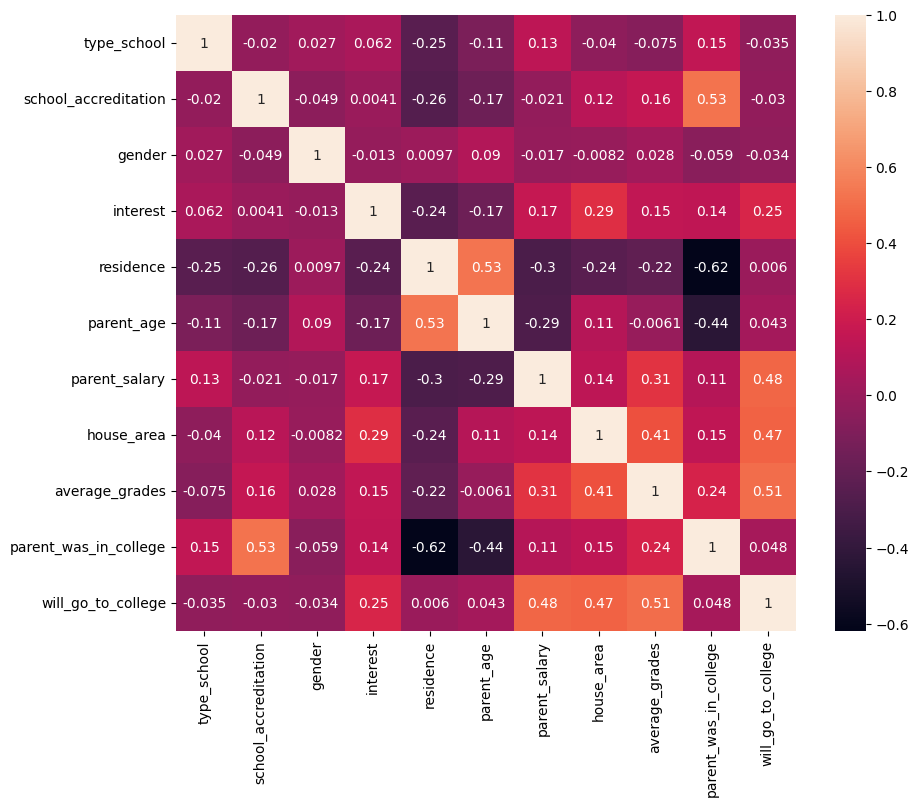

In [15]:
# Para os dados NORMALIZADOS
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Cria o heatmap
sns.heatmap(dados_normalizados.corr(), annot=True)

# Mostra o gráfico
plt.show()

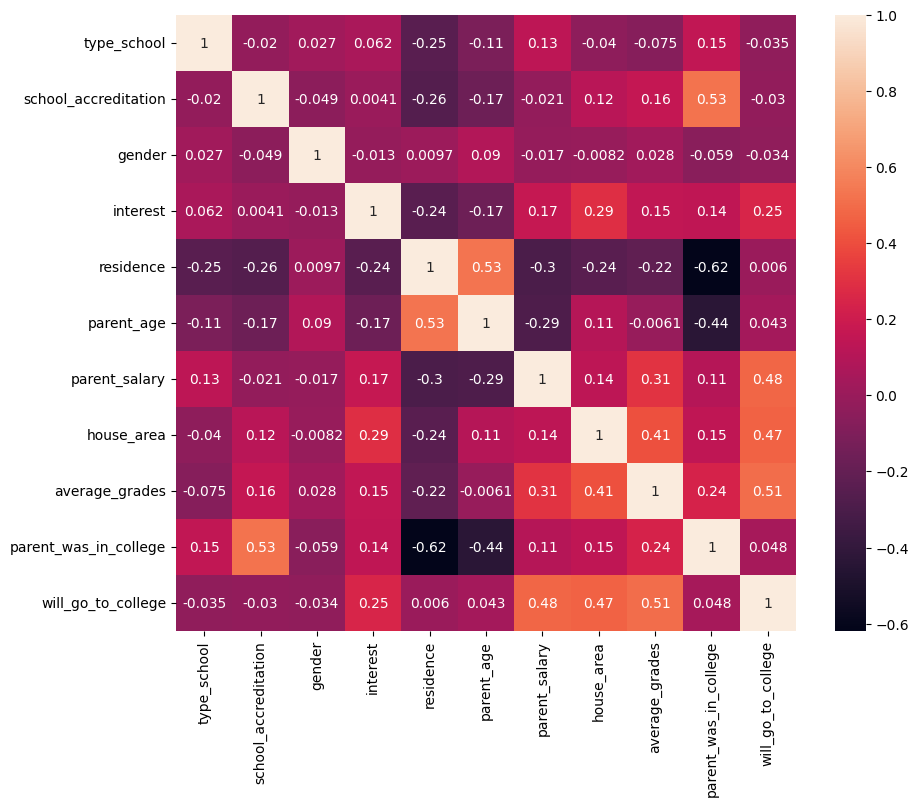

In [16]:
# Para os dados PADRONIZADOS

plt.figure(figsize=(10, 8))

# Cria o heatmap
sns.heatmap(dados_padronizados.corr(), annot=True)

# Mostra o gráfico
plt.show()

Vemos que tanto para os dados normalizados quanto para os dados padronizados, as colunas com os maiores indices de corelação são: "interest", "parent_salary", "house_area" e "average_grades". Serão essas as colunas usadas para o treinamento dos modelos.

Logo, temos três fontes de dados: 
* Dados crus (DC);
* Dados normalizados (DN);
* Dados padronizados (DP);

Esses dados serão usados para o treinamento dos modelos. Portando, vão existir, por exemplo:
kNN_DC, kNN_DN, kNN_DP

In [29]:
DC = dados.copy()
DN = dados_normalizados.copy()
DP = dados_padronizados.copy()

XDC = DC[["interest", "parent_salary", "house_area", "average_grades"]]
XDN = DN[["interest", "parent_salary", "house_area", "average_grades"]]
XDP = DP[["interest", "parent_salary", "house_area", "average_grades"]]

yDC = DC["will_go_to_college"]
yDN = DN["will_go_to_college"]
yDP = DP["will_go_to_college"]

,interest,parent_salary,house_area,average_grades
0,1,6950000,83.0,84.09
1,1,4410000,76.8,86.91
2,4,6500000,80.6,87.43
3,4,6600000,78.2,82.12
4,4,5250000,75.1,86.79


### Implementando os modelos

#### Separando os dados que vão ser usados no treinamento e no teste

In [18]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(XDC, yDC, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(XDN, yDN, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(XDP, yDP, test_size=0.2, random_state=42)

#### kNN

In [19]:
# Os modelos kNN

from sklearn.neighbors import KNeighborsClassifier

n_vizinhos = 7

kNN_DC = KNeighborsClassifier(n_neighbors=n_vizinhos)
kNN_DN = KNeighborsClassifier(n_neighbors=n_vizinhos)
kNN_DP = KNeighborsClassifier(n_neighbors=n_vizinhos)

In [20]:
# Treinamento

kNN_DC.fit(X_train1, y_train1)
kNN_DN.fit(X_train2, y_train2)
kNN_DP.fit(X_train3, y_train3)

pred_kNN_DC = kNN_DC.predict(X_test1)
pred_kNN_DN = kNN_DN.predict(X_test2)
pred_kNN_DP = kNN_DP.predict(X_test3)

In [21]:
# Acurácia dos modelos kNN
from sklearn.metrics import accuracy_score

acc_DC = accuracy_score(y_test1, pred_kNN_DC)
acc_DN = accuracy_score(y_test2, pred_kNN_DN)
acc_DP = accuracy_score(y_test3, pred_kNN_DP)

print(f'acc_DC: {acc_DC}\nacc_DN: {acc_DN}\nacc_DP: {acc_DP}')

acc_DC: 0.74
acc_DN: 0.89
acc_DP: 0.89


#### Decision Trees

In [22]:
# implementando os modelos
from sklearn.tree import DecisionTreeClassifier

dt_DC = DecisionTreeClassifier()
dt_DN = DecisionTreeClassifier()
dt_DP = DecisionTreeClassifier()

dt_DC.fit(X_train1, y_train1)
dt_DN.fit(X_train2, y_train2)
dt_DP.fit(X_train3, y_train3)

pred_dt_DC = dt_DC.predict(X_test1)
pred_dt_DN = dt_DN.predict(X_test2)
pred_dt_DP = dt_DP.predict(X_test3)

In [23]:
# Acurácia dos modelos dt
from sklearn.metrics import accuracy_score

acc_DC = accuracy_score(y_test1, pred_dt_DC)
acc_DN = accuracy_score(y_test2, pred_dt_DN)
acc_DP = accuracy_score(y_test3, pred_dt_DP)

print(f'acc_DC: {acc_DC}\nacc_DN: {acc_DN}\nacc_DP: {acc_DP}')

acc_DC: 0.86
acc_DN: 0.82
acc_DP: 0.86


#### Bayes

In [24]:
# Implementando os modelos Bayes
from sklearn.naive_bayes import GaussianNB

nb_DC = GaussianNB()
nb_DN = GaussianNB()
nb_DP = GaussianNB()


nb_DC.fit(X_train1, y_train1)
nb_DN.fit(X_train2, y_train2)
nb_DP.fit(X_train3, y_train3)

pred_nb_DC = nb_DC.predict(X_test1)
pred_nb_DN = nb_DN.predict(X_test2)
pred_nb_DP = nb_DP.predict(X_test3)

In [25]:
acc_DC = accuracy_score(y_test1, pred_nb_DC)
acc_DN = accuracy_score(y_test2, pred_nb_DN)
acc_DP = accuracy_score(y_test3, pred_nb_DP)

print(f'acc_DC: {acc_DC}\nacc_DN: {acc_DN}\nacc_DP: {acc_DP}')

acc_DC: 0.745
acc_DN: 0.835
acc_DP: 0.835


#### MLP

In [26]:
from sklearn.neural_network import MLPClassifier

neu_por_camada = 100

mlp_DC = MLPClassifier(hidden_layer_sizes=(neu_por_camada, neu_por_camada), max_iter=2500, solver='adam')
mlp_DN = MLPClassifier(hidden_layer_sizes=(neu_por_camada, neu_por_camada), max_iter=2500, solver='adam')
mlp_DP = MLPClassifier(hidden_layer_sizes=(neu_por_camada, neu_por_camada), max_iter=2500, solver='adam')

mlp_DC.fit(X_train1, y_train1)
mlp_DN.fit(X_train2, y_train2)
mlp_DP.fit(X_train3, y_train3)


pred_mlp_DC = mlp_DC.predict(X_test1)
pred_mlp_DN = mlp_DN.predict(X_test2)
pred_mlp_DP = mlp_DP.predict(X_test3)

acc_DC = accuracy_score(y_test1, pred_mlp_DC)
acc_DN = accuracy_score(y_test2, pred_mlp_DN)
acc_DP = accuracy_score(y_test3, pred_mlp_DP)

print(f'acc_DC: {acc_DC}\nacc_DN: {acc_DN}\nacc_DP: {acc_DP}')


acc_DC: 0.47
acc_DN: 0.855
acc_DP: 0.885


#### SVM

In [27]:
from sklearn import svm

svm_DC = svm.SVC()
svm_DN = svm.SVC()
svm_DP = svm.SVC()

svm_DC.fit(X_train1, y_train1)
svm_DN.fit(X_train2, y_train2)
svm_DP.fit(X_train3, y_train3)

pred_svm_DC = svm_DC.predict(X_test1)
pred_svm_DN = svm_DN.predict(X_test2)
pred_svm_DP = svm_DP.predict(X_test3)

acc_DC = accuracy_score(y_test1, pred_svm_DC)
acc_DN = accuracy_score(y_test2, pred_svm_DN)
acc_DP = accuracy_score(y_test3, pred_svm_DP)

print(f'acc_DC: {acc_DC}\nacc_DN: {acc_DN}\nacc_DP: {acc_DP}')


acc_DC: 0.74
acc_DN: 0.86
acc_DP: 0.85


# 2
Salve o melhor modelo. O melhor modelo deve ser escolhido após EDA, treino, otimização de hiperparâmetros e avaliação de resultados.

Analisando os resultados dos modelos da seção 1, vemos que os modelos kNN obtiveram os melhores resultados. No entando, por problemas técnicos, usaremos o modelo que melhor se saiu bem utilizando os dados crus. Logo, o modelo que usou a árvore de decisão.

In [28]:
# Salvando o modelo
import joblib

joblib.dump(dt_DC, 'modelo_knn.pk1')

['modelo_knn.pk1']

# 3

Crie uma API utilizando FastAPI ou outro framework, e faça o deploy no Heroku.

**OBS** : infelizmente não será possível rodar a seguinte célula. Será necessário criar um novo arquivo nomeado como "main.py". Depois, corrigir a roda que leva ao modelo_dt e usar o comando "uvicorn main:app --reload" para poder acessar a página web. 

Enquando o código rodar, use : http://127.0.0.1:8000/docs#/ para testar o modelo.


In [ ]:
from typing import Union
from fastapi import FastAPI
import joblib
import pandas as pd

app = FastAPI()
modelo_dt = joblib.load(r'ml-base-pipeline\notebooks\atividades\modelo_knn.pk1')

@app.get("/")
def read_root():
    return {"Hello": "World"}

@app.get("/items/{item_id}")
def read_item(item_id: int, q: Union[str, None] = None):
    return {"item_id": item_id, "q": q}

@app.get("/dados/{dados_enviados}")
def read_dados(interest: int, parent_salary: float, house_area: float, average_grades: float):
    vetor = [[interest, parent_salary, house_area, average_grades]]
    df = pd.DataFrame(vetor, columns=['interest', 'parent_salary', 'house_area', 'average_grades'])
    pred = modelo_dt.predict(vetor)
    
    if pred == 0:
        msg = " SINTO MUITO, MAS VOCÊ NÃO TEM MUITAS CHANCES DE ENTRAR NUMA FACULDADE"
    else:
        msg = " PARABÉNS !!! VOCÊ TEM GRANDES CHANCES DE ENTRAR NUMA FACULDADE"
    
    return {"RESPOSTA ": msg}